<a href="https://colab.research.google.com/github/HuynhTanNam-19146217/FOOD10/blob/CODE%2BFILE/Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as  tf
import numpy as np
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_set=train.flow_from_directory('/content/drive/MyDrive/Food/Train',target_size = (64,64),batch_size = 12,class_mode = 'categorical')
test_set=validation.flow_from_directory('/content/drive/MyDrive/Food/Validation',target_size = (64,64),batch_size = 12,class_mode = 'categorical')

Found 561 images belonging to 8 classes.
Found 233 images belonging to 8 classes.


In [ ]:
train_set.class_indices

{'bánh khọt': 0,
 'bánh mỳ': 1,
 'bánh xèo': 2,
 'bún riêu cua': 3,
 'cơm': 4,
 'gỏi cuốn': 5,
 'nem rán': 6,
 'phở': 7}

In [ ]:
model = tf.keras.models.Sequential(
    [ tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape =(64,64,3)),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),
     
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_uniform'),
      tf.keras.layers.Dense(8,activation='softmax')])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                 

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_set,batch_size=128,epochs=20,verbose=1,validation_data=test_set)

Epoch 1/20
47/47 [==============================] - 18s 366ms/step - loss: 2.0011 - accuracy: 0.2228 - val_loss: 1.5777 - val_accuracy: 0.4034
Epoch 2/20
47/47 [==============================] - 17s 358ms/step - loss: 1.6425 - accuracy: 0.3262 - val_loss: 1.5548 - val_accuracy: 0.3648
Epoch 3/20
47/47 [==============================] - 17s 356ms/step - loss: 1.5084 - accuracy: 0.3922 - val_loss: 1.3858 - val_accuracy: 0.4335
Epoch 4/20
47/47 [==============================] - 17s 361ms/step - loss: 1.4972 - accuracy: 0.3601 - val_loss: 1.4622 - val_accuracy: 0.3820
Epoch 5/20
47/47 [==============================] - 17s 358ms/step - loss: 1.3907 - accuracy: 0.4278 - val_loss: 1.1633 - val_accuracy: 0.4893
Epoch 6/20
47/47 [==============================] - 17s 359ms/step - loss: 1.2549 - accuracy: 0.4635 - val_loss: 1.1886 - val_accuracy: 0.5150
Epoch 7/20
47/47 [==============================] - 17s 359ms/step - loss: 1.1942 - accuracy: 0.5365 - val_loss: 1.2598 - val_accuracy: 0.4807

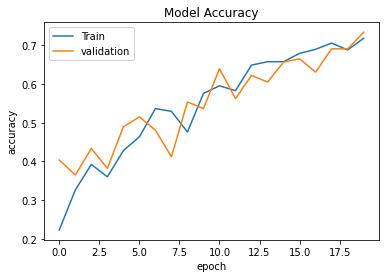

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [ ]:
score=model.evaluate(test_set,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

20/20 [==============================] - 2s 111ms/step - loss: 0.7646 - accuracy: 0.7339
Sai số:  0.7646019458770752
Độ chính xác:  0.733905553817749


In [ ]:
model.save('Food.h5')

In [ ]:
from tensorflow.keras.models import load_model
model1=load_model('Food.h5')

dự đoán: banhkhot


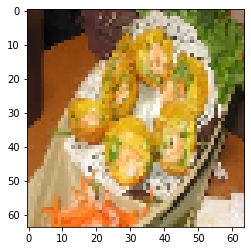

In [ ]:
test_img=load_img('/content/drive/MyDrive/Food/Validation/bánh khọt/banhkhot (43).png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
  prediction="banhkhot"
elif round(result[0][1])==1:
  prediction="banhmy"
elif round(result[0][2])==1:
  prediction="banhxeo"
elif round(result[0][3])==1:
  prediction="bunrieucua"  
elif round(result[0][4])==1:
  prediction="com" 
elif round(result[0][5])==1:
  prediction="goicuon"
elif round(result[0][6])==1:
  prediction="nem ran" 
elif round(result[0][7])==1:
  prediction="pho"
print('dự đoán:', prediction)